In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import matplotlib.pyplot as plt
import datetime
import pymysql as pms


db = pms.connect("140.118.126.136", "123", "1234567890", "test",cursorclass=pms.cursors.DictCursor)
cursor = db.cursor()
cursor.execute("select * from btc_usd order by DATE DESC")
result = cursor.fetchall()
btc_data = pd.DataFrame(result)
btc_data = btc_data.assign(DATE=pd.to_datetime(btc_data['DATE']))
btc_data['VOLUME'] = (pd.to_numeric(btc_data['VOLUME'], errors='coerce').fillna(0))
btc_data['VOLUME'] = btc_data['VOLUME'].astype('int64')
btc_data

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME
0,7889.900,7889.800,2018-04-17,8185.000,7889.90,7823.000,7889.850,28014
1,8009.800,8009.700,2018-04-16,8415.500,8009.00,7900.300,8009.750,37413
2,8333.000,8332.900,2018-04-15,8458.800,8332.90,7955.100,8332.950,32363
3,8063.100,8063.000,2018-04-14,8185.000,8063.20,7820.500,8063.050,28584
4,7824.000,7823.900,2018-04-12,8087.000,7824.00,6753.000,7823.950,95364
5,6785.300,6785.200,2018-04-10,6897.400,6785.30,6650.000,6785.250,26054
6,6698.400,6698.300,2018-04-09,7189.000,6698.40,6611.000,6698.350,76309
7,6596.500,6591.400,2018-04-06,6864.000,6595.60,6500.200,6593.950,41534
8,6780.000,6779.900,2018-04-05,6938.000,6780.00,6564.900,6779.950,46048
9,6741.300,6740.600,2018-04-04,7450.000,6741.30,6670.000,6740.950,53111


In [4]:
#def some fun tp process data
def add_newcol(btc_data): #新增closeoffhigh和volatolity欄位，增加模型訓練的準確度
    market_info = btc_data[btc_data['DATE']>='2017-01-01'] #將資料只獲取從2017-01-01之後的內容，存到 market_info
    kwargs = { 'CLOSE_OFF_HIGH': lambda x: 2*(x['HIGH'] - x['LAST']) / (x['HIGH'] - x['LOW']) - 1, # 1:收盤接近最低價  -1:收盤接近最高價  
          'VOLATILITY': lambda x: (x['HIGH'] - x['LOW']) / (x['MID'])}  #越趨近0越看好
    market_info = market_info.assign(**kwargs)
    return market_info
def create_model_data(btc_data):#選取待會訓練模型所需要的資料
    model_data = btc_data[["DATE"]+["LAST"]+["VOLUME"]+["CLOSE_OFF_HIGH"]+["VOLATILITY"]]
    model_data = model_data.sort_values(by='DATE')
    return model_data
def create_input_data(data,window_len):#決定訓練時以多少天的大小作訓練(window_len)，以每個為window_len大小的array，作為待會訓練模型的input
    norm_cols = ['LAST','VOLUME']
    inputs = [] #將Close,Volume以每筆的第一個資料來作正規化，讓值介於-1,1之間
    for i in range(len(data)-window_len):
        temp_set = data[i:(i+window_len)].copy()
        for col in norm_cols:
            temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1 #以window中的第一個為基準將"volume"與"last"做正規化
        inputs.append(temp_set)
    return inputs
def create_output_data(data,window_len):#模型的輸出
    return (data['LAST'][window_len:].values / data['LAST'][:-window_len].values) - 1
def data_to_np(data):#原本資料的型態為dataframe，這裡將型態轉為numpy array，模型的資料是以這種型態為主
    data = [np.array(datas)for datas in data]
    data = np.array(data)
    return data

In [5]:
market_info = add_newcol(btc_data)
market_info.head()

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
0,7889.9,7889.8,2018-04-17,8185.0,7889.9,7823.0,7889.85,28014,0.630387,0.045882
1,8009.8,8009.7,2018-04-16,8415.5,8009.0,7900.3,8009.75,37413,0.578028,0.064322
2,8333.0,8332.9,2018-04-15,8458.8,8332.9,7955.1,8332.95,32363,-0.500099,0.060447
3,8063.1,8063.0,2018-04-14,8185.0,8063.2,7820.5,8063.05,28584,-0.331687,0.045206
4,7824.0,7823.9,2018-04-12,8087.0,7824.0,6753.0,7823.95,95364,-0.605697,0.170502


In [6]:
model_data= create_model_data(market_info)
model_data.tail()

,DATE,LAST,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
4,2018-04-12,7824.0,95364,-0.605697,0.170502
3,2018-04-14,8063.2,28584,-0.331687,0.045206
2,2018-04-15,8332.9,32363,-0.500099,0.060447
1,2018-04-16,8009.0,37413,0.578028,0.064322
0,2018-04-17,7889.9,28014,0.630387,0.045882


In [7]:
split_date = '2018-01-01' #將training_set,test_set從這個日期做劃分
training_set, test_set = model_data[model_data['DATE']<split_date], model_data[model_data['DATE']>=split_date]
test_set.head()

,DATE,LAST,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
101,2018-01-01,13769.0,43269,-0.568493,0.148509
100,2018-01-02,13375.0,29564,-0.071685,0.083464
99,2018-01-03,14723.1,56195,-0.425582,0.183826
98,2018-01-04,15134.0,38358,-0.365202,0.061305
97,2018-01-05,15175.0,46460,-0.637058,0.089802


In [8]:
training_set = training_set.drop('DATE', 1) #將Date的欄位刪掉，因為之後不會需要用到它，因為後面要將形式轉為np array，故只留數值的部分
test_set = test_set.drop('DATE', 1)

In [9]:
window_len = 10 #決定模型要獲取幾天前的數據，隨意選擇
norm_cols = ['LAST','VOLUME']
LSTM_training_inputs = create_input_data(training_set,10)
LSTM_test_inputs = create_input_data(test_set,10)
LSTM_training_outputs = create_output_data(training_set,10)
LSTM_training_outputs=LSTM_training_outputs[:,np.newaxis,np.newaxis]
print(LSTM_training_outputs)

[[[-0.06296231]]

 [[-0.21984708]]

 [[-0.21040706]]

 [[-0.20306358]]

 [[-0.28409091]]

 [[-0.18204106]]

 [[-0.07612688]]

 [[-0.00452593]]

 [[-0.03030899]]

 [[-0.00160574]]

 [[-0.01060999]]

 [[ 0.18530966]]

 [[ 0.14749252]]

 [[ 0.09522255]]

 [[ 0.08653552]]

 [[ 0.08846894]]

 [[ 0.10272256]]

 [[ 0.01405989]]

 [[ 0.03523093]]

 [[ 0.01218998]]

 [[ 0.02367934]]

 [[ 0.04564836]]

 [[ 0.06473823]]

 [[ 0.1114913 ]]

 [[ 0.14716002]]

 [[ 0.15419488]]

 [[ 0.09966462]]

 [[ 0.11552307]]

 [[ 0.14429592]]

 [[ 0.14941647]]

 [[ 0.07372242]]

 [[ 0.02772718]]

 [[ 0.01675614]]

 [[-0.01092354]]

 [[-0.0200413 ]]

 [[-0.01726312]]

 [[ 0.00735148]]

 [[ 0.0155486 ]]

 [[ 0.0045623 ]]

 [[ 0.01039184]]

 [[ 0.07229515]]

 [[ 0.09860119]]

 [[ 0.1296    ]]

 [[ 0.1311245 ]]

 [[ 0.19485811]]

 [[ 0.16964374]]

 [[ 0.13708087]]

 [[ 0.13500241]]

 [[ 0.1315167 ]]

 [[ 0.12200415]]

 [[ 0.16909676]]

 [[ 0.15262627]]

 [[ 0.14173159]]

 [[ 0.12462276]]

 [[ 0.07365415]]

 [[ 0.0793

In [10]:
LSTM_training_inputs[0]

,LAST,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
457,0.000000,0.000000,-0.862872,0.023982
456,0.033757,0.880509,-0.679045,0.045317
455,0.054717,2.050791,-0.242054,0.040120
454,0.073856,0.976773,-0.849057,0.025518
453,0.178966,6.513362,-0.816901,0.099767
452,0.038061,11.763117,0.031693,0.314032
451,-0.070463,7.030083,0.642857,0.171409
450,-0.060531,4.683923,-0.937767,0.105767
449,-0.052462,3.298447,0.033582,0.058518
448,-0.065797,1.320834,-0.343405,0.046179


In [42]:
test_set['LAST']

101    13769.00
100    13375.00
99     14723.10
98     15134.00
97     15175.00
96     16900.00
95     17175.00
94     16180.00
93     14920.00
92     14462.00
91     14900.00
90     13254.00
89     13800.00
88     14197.00
87     13549.00
86     13597.00
85     11069.50
84     11122.00
83     10998.70
82     11470.00
81     12731.00
80     11522.00
79     10789.00
78     10826.00
77     11187.00
76     11131.00
75     11380.00
74     11849.00
73     11223.00
72     10077.00
         ...   
29      8175.10
28      8267.70
27      8494.30
26      7993.00
25      8147.00
24      8505.00
23      8932.00
22      8870.00
21      8690.90
20      8639.70
19      8481.00
18      8177.40
17      7926.50
16      7962.00
15      7219.90
14      6774.60
13      6944.10
12      6806.10
11      7025.60
10      7394.13
9       6741.30
8       6780.00
7       6595.60
6       6698.40
5       6785.30
4       7824.00
3       8063.20
2       8332.90
1       8009.00
0       7889.90
Name: LAST, Length: 102,

In [12]:
#以 np array的形式做處理，當存以數字的形式
LSTM_training_inputs = data_to_np(LSTM_training_inputs)
LSTM_test_inputs = data_to_np(LSTM_test_inputs)
training_set['LAST']


457      966.61
456      999.24
455     1019.50
454     1038.00
453     1139.60
452     1003.40
451      898.50
450      908.10
449      915.90
448      903.01
447      905.75
446      779.56
445      804.99
444      827.22
443      815.85
442      820.74
441      830.10
440      903.99
439      888.14
438      901.56
437      896.14
436      924.02
435      923.72
434      905.99
433      886.45
432      893.35
431      915.37
430      916.70
429      919.43
428      912.55
         ...   
131     9907.10
130    10860.00
129    10876.00
128    11161.00
127    11599.00
126    11590.00
125    13503.00
124    16607.00
123    15816.80
122    14660.00
121    14937.00
120    16754.00
119    16172.00
118    16384.00
117    17569.50
116    19210.00
115    18959.00
114    18925.00
113    17340.00
112    16425.00
111    15650.00
110    13174.00
109    14036.00
108    13517.00
107    13634.00
106    15680.00
105    15375.00
104    14323.00
103    14308.00
102    12385.00
Name: LAST, Length: 356,

In [66]:
BATCHSIZE=1
INPUTSIZE=4
OUTPUTSIZE=1
TIMESTEP=10
CELL_SIZE=16
LR=0.0006

tf.reset_default_graph()


class LSTMRNN(object):
    def __init__(self,input_size,output_size,batch_size,n_steps,cell_size):
        self.input_size=input_size
        self.output_size=output_size
        self.batch_size=batch_size
        self.n_steps=n_steps
        self.cell_size=cell_size       
            
    def add_input_layer(self):
        l_in_x=tf.reshape(self.xs,[-1,self.input_size],name="2_2D")
        W_in=self.Weight_variable([self.input_size,self.cell_size])
        B_in=self.Biases_variable([self.cell_size])
        with tf.name_scope('Wx_plus_b'):
            l_in_y=tf.matmul(l_in_x,W_in)+B_in
        self.l_in_y=tf.reshape(l_in_y,[-1,self.n_steps,self.cell_size],name='2_3D') #[346,10,16]
        
    def add_cell(self):
        lstm_cell=tf.contrib.rnn.BasicLSTMCell(self.cell_size,forget_bias=1,state_is_tuple=True)
        with tf.name_scope('initial_state'):
            self.cell_initial_state=lstm_cell.zero_state(self.batch_size,dtype=tf.float32)
        self.cell_outputs,self.cell_final_state=tf.nn.dynamic_rnn(lstm_cell,self.l_in_y,initial_state=self.cell_initial_state,time_major=False)
        
    def add_output_layer(self):        
        l_out_x=tf.reshape(self.cell_outputs,[-1,self.cell_size],name="2_2d")
        W_out=self.Weight_variable([self.cell_size,self.output_size])
        B_out=self.Biases_variable([self.output_size])
        with tf.name_scope('Wx_plus_b'):
            self.pred=tf.matmul(l_out_x,W_out)+B_out
        
        
    def Weight_variable(self,shape,name="weight"):
        initializer=tf.random_normal_initializer(mean=0,stddev=1)
        return tf.get_variable(shape=shape,initializer=initializer,name=name)
    def Biases_variable(self,shape,name='biases'):
        initializer=tf.constant_initializer(0.1)
        return tf.get_variable(shape=shape,initializer=initializer,name=name)
        
    def compute_cost(self):
        self.loss=tf.reduce_mean(tf.square(tf.reshape(self.pred,[- 1])-tf.reshape(self.ys, [-1])))
    
    def train_model(self):
        with tf.name_scope('inputs'):
            self.xs=tf.placeholder(tf.float32,[None,self.n_steps,self.input_size],name="xs")
            self.ys=tf.placeholder(tf.float32,[None,1,self.output_size],name="ys")
        with tf.variable_scope('in_hidden'):
            self.add_input_layer()
        with tf.variable_scope('LSTM_cell'):    
            self.add_cell()
        with tf.variable_scope('out_hidden'):
            self.add_output_layer()
        with tf.name_scope('cost'):
            self.compute_cost()
        with tf.name_scope('train'):
            self.train_op=tf.train.AdamOptimizer(LR).minimize(self.loss)
        #saver=tf.train.Saver()
        sess=tf.Session()
        init=tf.global_variables_initializer()
        writer = tf.summary.FileWriter("logs/", sess.graph)
        sess.run(init)
        for epoch in range(100):
            tran=[]
            for i in range(len(LSTM_training_inputs)):
                if epoch==0:
                    feed_dict={self.xs:LSTM_training_inputs[np.newaxis,i],self.ys:LSTM_training_outputs[np.newaxis,i]}
                else:
                    feed_dict={self.xs:LSTM_training_inputs[np.newaxis,i],self.ys:LSTM_training_outputs[np.newaxis,i],self.cell_initial_state:state}

                _, cost, state, pred=sess.run([self.train_op, self.loss, self.cell_final_state, self.pred],feed_dict=feed_dict)
                tran.append(pred.sum()/10)
            if epoch % 20 == 0:
                print('cost: ', round(cost, 4))
            
#        saver.save(sess, './checkpoint_dir/MyModel',global_step=1000)            
        tran=np.array(tran)
        print((tran+1)*training_set['LAST'][0:-10])  
        
        
    def predict_model(self):
        with tf.name_scope('inputs'):
            self.xs=tf.placeholder(tf.float32,[None,self.n_steps,self.input_size],name="xs")
        with tf.variable_scope('in_hidden'):
            self.add_input_layer()
        with tf.variable_scope('LSTM_cell'):        
            self.add_cell()
        with tf.variable_scope('out_hidden'):    
            self.add_output_layer()
        saver=tf.train.Saver(tf.global_variables())
        with tf.Session() as sess:
            new_saver = tf.train.import_meta_graph('./checkpoint_dir/MyModel-1000.meta')
            new_saver.restore(sess, tf.train.latest_checkpoint('./checkpoint_dir'))
            self.test_predict=[]
            for step in range(len(LSTM_test_inputs)):
                prob=sess.run(self.pred,feed_dict={self.xs:LSTM_test_inputs[np.newaxis,step]})
                predict=prob.reshape((-1))
                self.test_predict.append(predict.sum()/10)
        self.test_predict=np.array(self.test_predict)
        self.test_predict=(self.test_predict+1)*test_set['LAST'][:-10]
        acc=np.average(np.abs(self.test_predict-test_set['LAST'][:-10])/test_set['LAST'][:-10])
        print(acc)
        
model=LSTMRNN(INPUTSIZE,OUTPUTSIZE,BATCHSIZE,TIMESTEP,CELL_SIZE)
#model.train_model()
model.predict_model()

            

INFO:tensorflow:Restoring parameters from ./checkpoint_dir\MyModel-1000
0.712097141017


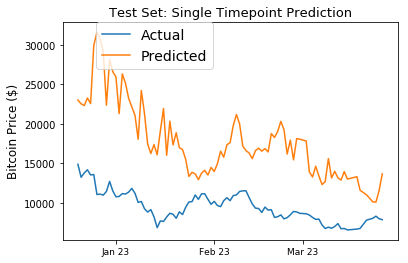

In [56]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
        model.test_predict, 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()